In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [2]:
train = pd.read_parquet("train.parquet")
test = pd.read_parquet("test.parquet")
X_train, y_train = train["clean_text"].values, train["HATEFUL"].values
X_test, y_test = test["clean_text"].values, test["HATEFUL"].values

In [3]:
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [11]:
pipeline = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf", SVC(kernel = "linear",
                random_state= 42,
                class_weight= class_weights,
                probability= True
                ))
])

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 SVC(class_weight={0: np.float64(0.5909633897828683),
                                   1: np.float64(3.2483584395519505)},
                     kernel='linear', probability=True, random_state=42))])

In [13]:
y_pred = pipeline.predict(X_test)

In [14]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      8961
           1       0.49      0.62      0.54      1682

    accuracy                           0.84     10643
   macro avg       0.70      0.75      0.72     10643
weighted avg       0.85      0.84      0.84     10643



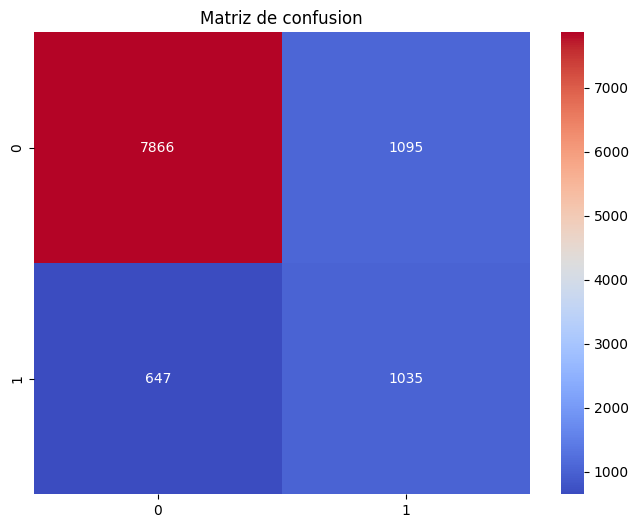

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.title("Matriz de confusion")
sns.heatmap(cm, annot=True, fmt = "d", cmap = "coolwarm")
plt.show()

In [19]:
y_pred_train = pipeline.predict(X_train)
np.mean(y_pred_train == y_train)

np.float64(0.9368014268727705)

In [22]:
y_scores_train = pipeline.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_scores_train)
roc_auc = auc(fpr_train, tpr_train)
roc_auc

np.float64(0.9844314723847336)

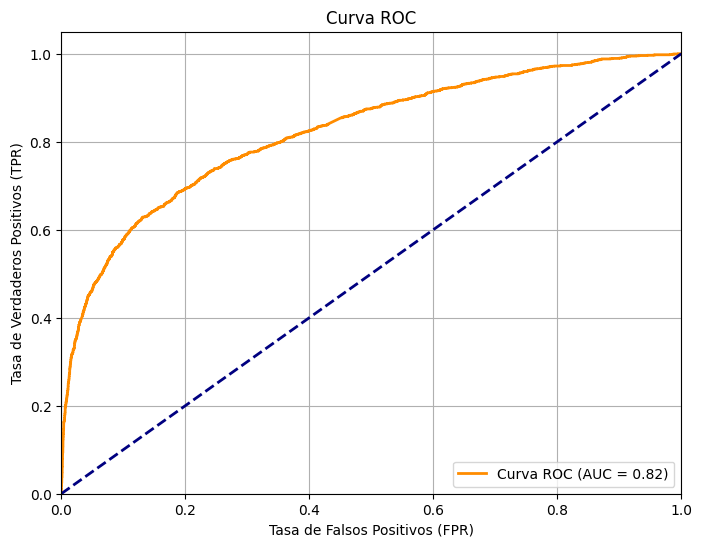

In [18]:
y_scores = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
